In [1]:
import os
import librosa   #for audio processing
import itertools
import IPython.display as ipd
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile #for audio processing
import warnings
warnings.filterwarnings("ignore")
import os,sys
sys.path.append(os.path.abspath(os.path.join('../scripts')))
from clean import Clean
from eda import EDA

In [2]:
cleaning_audios = Clean()

2022-05-31 06:31:28,006:logger:Successfully initialized clean class


In [3]:
prefix = '/home/martin/Documents/ALFFA_PUBLIC/ASR/'
swahilis = cleaning_audios.load_audios(prefix,'swahili',0,2)
amharics = cleaning_audios.load_audios(prefix,'amharics',0,2)

2022-05-31 06:31:29,172:logger:successfully loaded /home/martin/Documents/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part12.wav
2022-05-31 06:31:29,375:logger:successfully loaded /home/martin/Documents/ALFFA_PUBLIC/ASR/SWAHILI/data/train/wav/SWH-15-20110224/SWH-15-20110224_16k-emission_swahili_15h00_-_16h00_tu_20110224_part131.wav
2022-05-31 06:31:30,144:logger:successfully loaded tr_2426_tr25027.wav
2022-05-31 06:31:30,613:logger:successfully loaded tr_7707_tr78008.wav



This returns an audio time series as a numpy array with a default sampling rate(sr) of 22KHZ mono. We can change this behavior by resampling at 44.1KHz.

In [12]:
swahilis

[(array([ 0.03245375,  0.03846586,  0.0385337 , ..., -0.07476594,
         -0.05082636, -0.02326697], dtype=float32),
  44100),
 (array([-0.02488699, -0.03716682, -0.04580902, ...,  0.1096026 ,
          0.07886446,  0.03810541], dtype=float32),
  44100)]

Playing Audio:

Using,IPython.display.Audio you can play the audio in your jupyter notebook.

In [4]:
audio,rate = amharics[0]
ipd.Audio(audio, rate=rate)

In [4]:
audio,rate = swahilis[0]
ipd.Audio(audio, rate=rate)

Visualizing Audio:

We can plot the audio array using librosa.display.waveplot:

2022-05-31 06:31:35,160:logger:Successfully initialized eda class


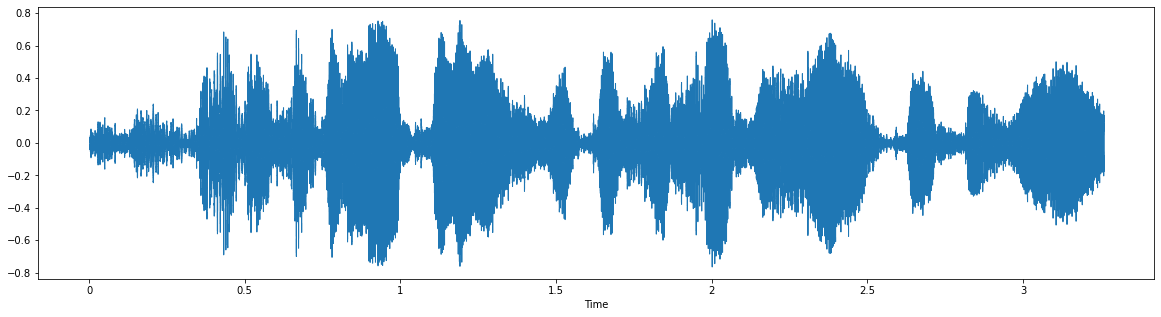

In [5]:
%matplotlib inline
eda = EDA()
eda.sound_plots(audio,rate,'waveshow')


### Spectrogram
 
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

A spectrogram is usually depicted as a heat map, i.e., as an image with the intensity shown by varying the color or brightness.

We can display a spectrogram using. librosa.display.specshow.

In [6]:
spe_samples,frequency=eda.spectrogram(audio)

In [9]:
frequency

array([0.       , 0.0078125, 0.015625 , 0.0234375, 0.03125  , 0.0390625,
       0.046875 , 0.0546875, 0.0625   , 0.0703125, 0.078125 , 0.0859375,
       0.09375  , 0.1015625, 0.109375 , 0.1171875, 0.125    , 0.1328125,
       0.140625 , 0.1484375, 0.15625  , 0.1640625, 0.171875 , 0.1796875,
       0.1875   , 0.1953125, 0.203125 , 0.2109375, 0.21875  , 0.2265625,
       0.234375 , 0.2421875, 0.25     , 0.2578125, 0.265625 , 0.2734375,
       0.28125  , 0.2890625, 0.296875 , 0.3046875, 0.3125   , 0.3203125,
       0.328125 , 0.3359375, 0.34375  , 0.3515625, 0.359375 , 0.3671875,
       0.375    , 0.3828125, 0.390625 , 0.3984375, 0.40625  , 0.4140625,
       0.421875 , 0.4296875, 0.4375   , 0.4453125, 0.453125 , 0.4609375,
       0.46875  , 0.4765625, 0.484375 , 0.4921875, 0.5      , 0.5078125,
       0.515625 , 0.5234375, 0.53125  , 0.5390625, 0.546875 , 0.5546875,
       0.5625   , 0.5703125, 0.578125 , 0.5859375, 0.59375  , 0.6015625,
       0.609375 , 0.6171875, 0.625    , 0.6328125, 

In [10]:
spe_samples

array([[6.50946827e-04, 1.11380041e-04, 4.64078530e-03, ...,
        4.19453649e-02, 2.17151728e-03, 1.48492234e-01],
       [4.55192880e-04, 3.00930548e-03, 3.98218227e-03, ...,
        8.16353944e-01, 7.86035068e-01, 7.74218901e-01],
       [1.10950318e-04, 8.99072393e-04, 3.55849638e-04, ...,
        3.51964328e-01, 4.03401951e-01, 5.28770560e-01],
       ...,
       [1.97951214e-15, 9.65216487e-17, 5.03909590e-17, ...,
        1.11648160e-15, 7.30365384e-16, 8.92744061e-16],
       [1.98022137e-15, 4.46816669e-16, 7.14873830e-17, ...,
        7.63910210e-16, 1.36149248e-15, 1.46217519e-15],
       [9.37251067e-16, 6.12794149e-17, 2.68567444e-17, ...,
        2.78294150e-16, 9.45658453e-17, 9.08837122e-18]])

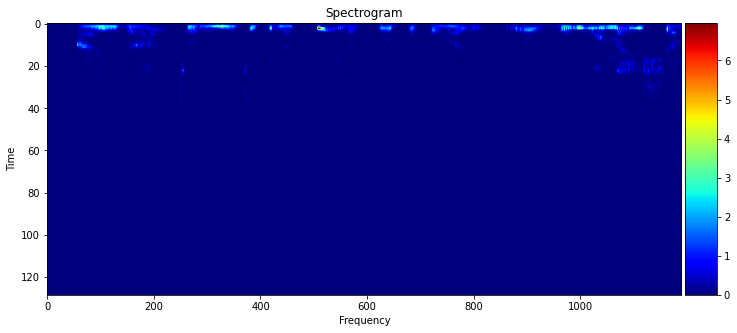

In [9]:
eda.plot_spectrogram_feature(spe_samples)

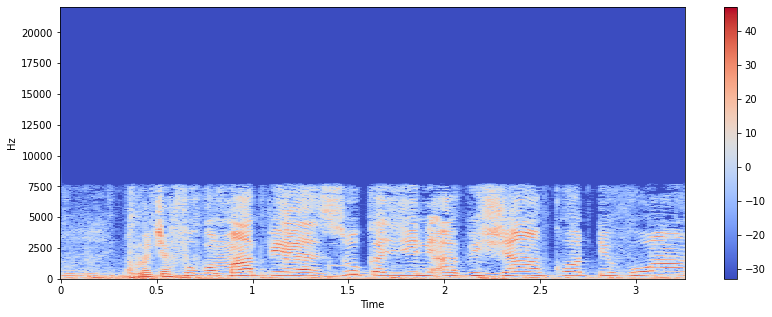

In [6]:
eda.sound_plots(audio,rate,'specshow')

The vertical axis shows frequencies (from 0 to 8kHz), and the horizontal axis shows the time of the clip. 

.stft() converts data into short term Fourier transform. STFT converts signals such that we can know the amplitude of the given frequency at a given time. Using STFT we can determine the amplitude of various frequencies playing at a given time of an audio signal.
.specshow is used to display a spectrogram.
The vertical axis shows frequencies (from 0 to 10kHz), and the horizontal axis shows the time of the clip. 


# Data Augumentation

###Time Shifting
Here we shift the wave by sample_rate/10 factor. This will move the wave to the right by given factor along time axis.
For achieving this I have used numpy’s roll function to generate time shifting.


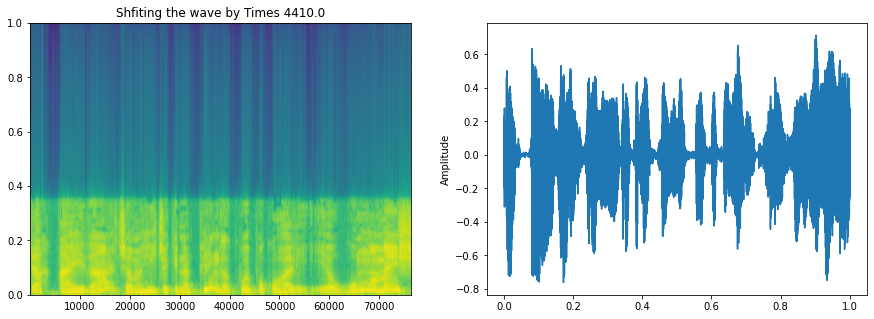

In [8]:
wav_roll = np.roll(audio,int(rate/9))
eda.plot_spec(data=wav_roll,sr=rate)
ipd.Audio(wav_roll,rate=rate)

Other Data Augumentation Methods are
1. Pitch Shifting
2. Time Streching 

###Feature extraction from Audio signal
 
Every audio signal consists of many features. However, we must extract the characteristics that are relevant to the problem we are trying to solve. The process of extracting features to use them for analysis is called feature extraction. 


**Mel-Frequency Cepstral Coefficients(MFCCs)**

The Mel frequency cepstral coefficients (MFCCs) of a signal are a small set of features (usually about 10–20) which concisely describe the overall shape of a spectral envelope. It models the characteristics of the human voice.



In [10]:
mfcc_features = eda.features(audio,rate,'mfcc')

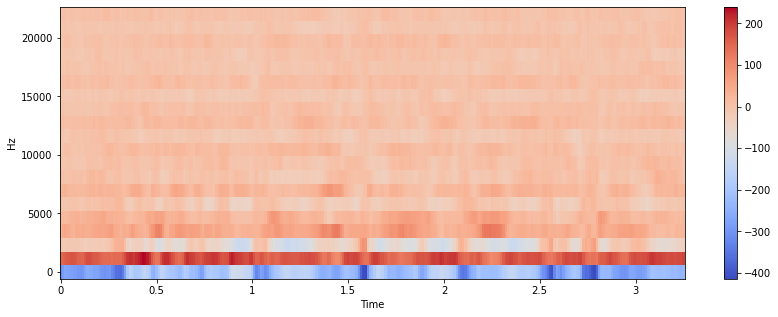

In [11]:
eda.sound_plots(audio,rate,'specshow',features=mfcc_features)

Transcription preprocessing 

In [ ]:
Am alphabet = 'ያንደኛደረጃትምህርታቸውንጐንደርተምረዋል'
en_alpahbet='abcdefghijklmnopqrstuvwxyz'
def char_index(alphabet):
    a_map = {} # map letter to number
    rev_a_map = {} # map number to letter
    for i, a in enumerate(alphabet):
        a_map[a] = i
        rev_a_map[i] = a
    return rev_a_map